# Predicting loan repayment using Machine Learning classification models

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
sklearn.__version__

'0.24.1'

In [4]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

#### Packages are specificed below

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
loans = pd.read_csv('loans_train.csv')
loans_outcome_not_known = pd.read_csv('loans_outcome_not_known.csv')
print(loans.shape)
print(loans_outcome_not_known.shape)

(7478, 14)
(2100, 13)


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


In [7]:
loans_outcome_not_known.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0
1,0,educational,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0
2,1,debt_consolidation,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0
3,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0
4,1,credit_card,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0


**Check out the info(), head(), and describe() methods on loans.**

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000,7.478000e+03,7478.000000,7478.000000,7478.000000,7478.000000,7478.000000
mean,0.800615,0.123130,322.555320,10.936374,12.624763,710.180663,4543.688470,1.729738e+04,46.917329,1.618748,0.161942,0.063921,0.191629
std,0.399565,0.026727,208.950622,0.621971,6.896500,37.537593,2477.818646,3.601391e+04,28.982548,2.244517,0.530832,0.263576,0.393609
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.105100,165.425000,10.555813,7.200000,682.000000,2820.000000,3.109000e+03,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122900,271.110000,10.933107,12.680000,707.000000,4110.041667,8.654000e+03,46.600000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.141100,441.600000,11.302204,17.992500,737.000000,5700.958333,1.827000e+04,70.775000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.180154,29.960000,822.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
print("The unique value are: ", loans['not.fully.paid'].unique())
print("-------------------------------------------------------------")
print("Below is the number of people who paid back and not paid back")
print(loans['not.fully.paid'].value_counts())
print("-------------------------------------------------------------")
notFullPaid = loans['not.fully.paid'].value_counts()[0]
sum_ = loans['not.fully.paid'].value_counts().sum()
ratio = (notFullPaid/sum_)*100
print("Proportion of not fully paid: {} %".format(round(ratio, 2)))
print("Proportion of the rest: {} %".format(round(100 - ratio, 2)))
print("-------------------------------------------------------------")
print("1 means the person who took the loan did not fully pay it back")
print("0 is otherwise")
print("-------------------------------------------------------------")

The unique value are:  [0 1]
-------------------------------------------------------------
Below is the number of people who paid back and not paid back
0    6045
1    1433
Name: not.fully.paid, dtype: int64
-------------------------------------------------------------
Proportion of not fully paid: 80.84 %
Proportion of the rest: 19.16 %
-------------------------------------------------------------
1 means the person who took the loan did not fully pay it back
0 is otherwise
-------------------------------------------------------------


### Q&A

##### How many rows and variables are there?
As per loans.info(), it displayed 14 columns with 7,478 rows in full dataset of loans_train.

##### What are the unique values of not.fully.paid?
It consists of 2 unique values '1' implying person with loan did not fully pay back and '0' for the otherwise. 


#### What's the proportion of those people in the full dataset?
The percentage of people who took the loan did not fully pay it back is 80.84 while the rest is 19.16.


# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [11]:
credit_1 = loans['fico'].loc[(loans['credit.policy'] == 1)]
credit_0 = loans['fico'].loc[(loans['credit.policy'] == 0)]

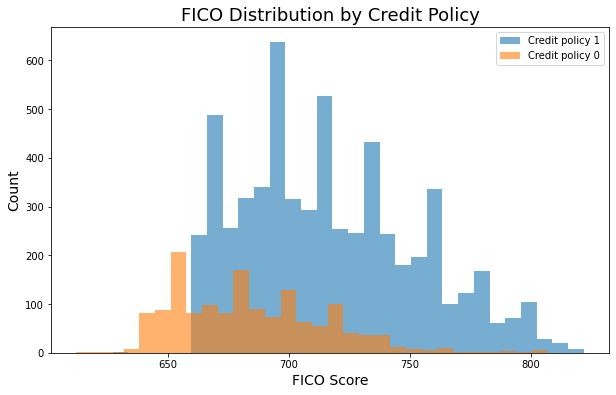

In [12]:
plt.figure(figsize=(10,6))
plt.hist(credit_1, bins=30, alpha=0.6,label="Credit policy 1")
plt.hist(credit_0, bins=30, alpha=0.6, label="Credit policy 0")
plt.xlabel("FICO Score", size=14)
plt.ylabel("Count", size=14)
plt.title("FICO Distribution by Credit Policy", size=18)
plt.legend(loc='upper right')

**Create a similar figure, except this time select by the not.fully.paid column.**

In [13]:
paid_1 = loans['fico'].loc[(loans['not.fully.paid'] == 1)]
paid_0 = loans['fico'].loc[(loans['not.fully.paid'] == 0)]

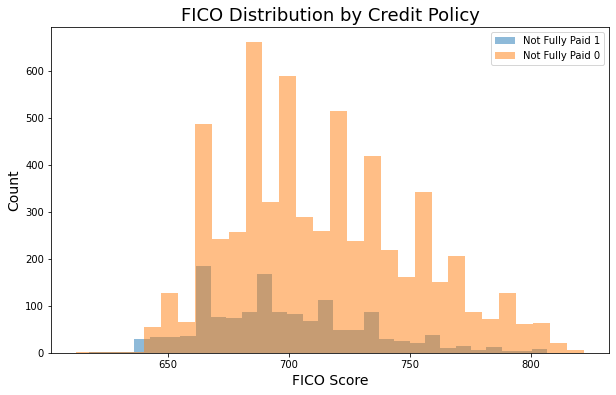

In [14]:
plt.figure(figsize=(10,6))
plt.hist(paid_1, bins=30, alpha=0.5,label="Not Fully Paid 1")
plt.hist(paid_0, bins=30, alpha=0.5, label="Not Fully Paid 0")
plt.xlabel("FICO Score", size=14)
plt.ylabel("Count", size=14)
plt.title("FICO Distribution by Credit Policy", size=18)
plt.legend(loc='upper right')

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

In [15]:
purpose = loans['purpose']
purpose.value_counts() 

debt_consolidation    3075
all_other             1782
credit_card            972
home_improvement       514
small_business         508
major_purchase         347
educational            280
Name: purpose, dtype: int64

Text(0.5, 1.0, 'The count of loans by purpose')

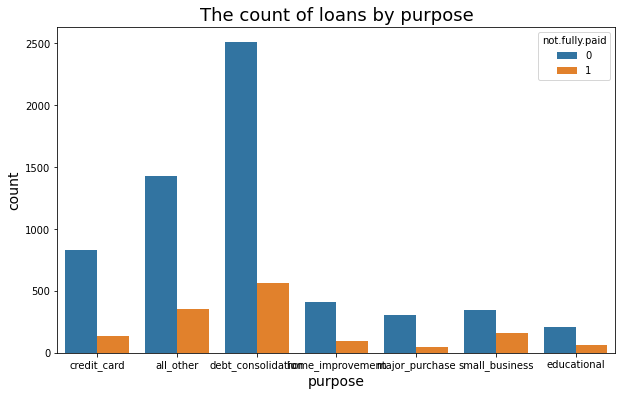

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data = loans, x = 'purpose', hue = 'not.fully.paid')
plt.ylabel("count", size=14)
plt.xlabel("purpose", size=14)
plt.title("The count of loans by purpose", size=18)

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

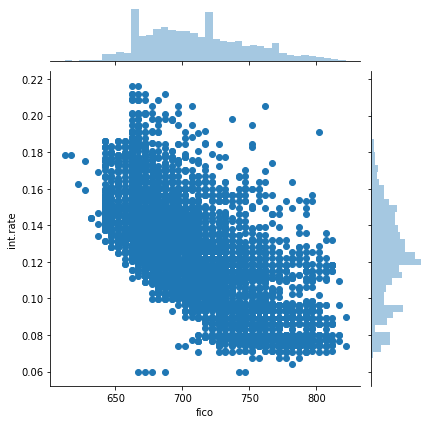

In [17]:
sns.jointplot(data = loans, x = 'fico', y = 'int.rate')

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

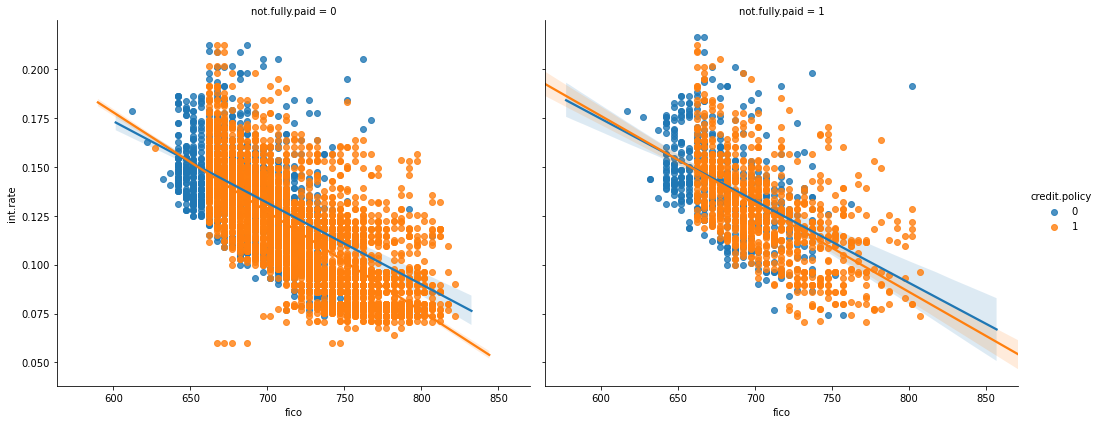

In [18]:
sns.lmplot(data=loans, x="fico", y="int.rate", col="not.fully.paid", 
           hue="credit.policy", height=6, aspect=1.2)

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [20]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

In [21]:
loans['purpose'].unique()

array(['credit_card', 'all_other', 'debt_consolidation',
       'home_improvement', 'major_purchase', 'small_business',
       'educational'], dtype=object)

In [22]:
cat_feats = ['purpose']
loans = pd.get_dummies(loans, columns=cat_feats)

In [23]:
loans_outcome_not_known = pd.get_dummies(loans_outcome_not_known, columns=cat_feats)

In [24]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0,0,1,0,0,0,0,0
1,1,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0,1,0,0,0,0,0,0
2,1,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0,0,0,1,0,0,0,0
3,1,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1,0,0,1,0,0,0,0
4,0,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0,0,0,1,0,0,0,0


In [25]:
loans_outcome_not_known.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0,0,0,1,0,0,0,0
1,0,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0,0,0,0,1,0,0,0
2,1,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0,0,0,1,0,0,0,0
3,0,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0,0,0,0,0,1,0
4,1,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [28]:
# Import DecisionTreeClassifier and its metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree
from sklearn.metrics import recall_score, balanced_accuracy_score, f1_score, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score

In [29]:
# Initiate Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=2020)
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

In [30]:
#Predict the response for train dataset
y_pred1 = clf.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",round(metrics.accuracy_score(y_train, y_pred1), 4))
print("Train Balanced Accuracy: ", round(balanced_accuracy_score(y_train, y_pred1), 4))

Train Accuracy: 1.0
Train Balanced Accuracy:  1.0


In [31]:
#Predict the response for validation dataset
y_pred2 = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Validation Accuracy:",round(metrics.accuracy_score(y_val, y_pred2), 4))
print("Validation Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred2), 4))

Validation Accuracy: 0.7139
Validation Balanced Accuracy:  0.5396


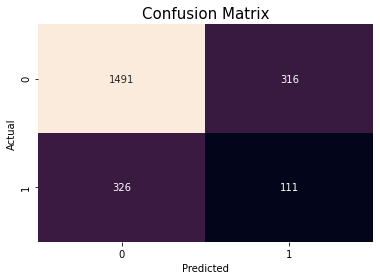

In [32]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [33]:
print(metrics.classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1807
           1       0.26      0.25      0.26       437

    accuracy                           0.71      2244
   macro avg       0.54      0.54      0.54      2244
weighted avg       0.71      0.71      0.71      2244



In [34]:
print("Recall: ", round(recall_score(y_val, y_pred2), 4))
print("Specificity: ", round(1491/(1491+316), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred2), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred2), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred2), 4))

Recall:  0.254
Specificity:  0.8251
Precision Score:  0.26
Balanced Accuracy:  0.5396
F1 Score:  0.2569


From above report, it could be seen that the classes are imbalanced!! as it showed that class 0 is more than triple from class 1. This would lead to inaccurate interpretation if evaluation metric of accuracy is solely used in this case. Accuracy can be used when the class distribution is similar while Balanced Accuracy and F1-score would be better options when there are imbalanced classes as in the above case.

#### Using all the training data perform cross-validation

In [35]:
# Select the min_samples_split hyper-parameter and apply cross validation to find the best value
min_samples_split = list(range(2, 50, 2))
cvScore = []
for sn in min_samples_split:
    # Initiate Decision Tree classifer object
    clf = DecisionTreeClassifier(min_samples_split = sn, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("Min_samples_split: ", min_samples_split[index])
print("Balanced Accuracy: ", max(cvScore))

Min_samples_split:  18
Balanced Accuracy:  0.5488394543589245


In [36]:
# Select the max_depth hyper-parameter and apply cross validation to find the best value
max_depth = list(range(2, 50, 2))
cvScore = []
for md in max_depth:
    # Initiate Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth = md, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("Max_Depth: ", max_depth[index])
print("Balanced Accuracy: ", max(cvScore))

Max_Depth:  16
Balanced Accuracy:  0.5442718483510334


#### Perform grid search where you check for combinations of these hyper-parameters

In [37]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [38]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(2, 50, 2)),
    'min_samples_split': list(range(2, 50, 2))
}

# Create a based model
clf = DecisionTreeClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                       44, 46, 48],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28, 30, 32, 34,
                                               36, 38, 40, 42, 44, 46, 48]},
             scoring='balanced_accuracy')

### The best model

In [39]:
# examine the best model
# Single best score achieved across all params
print("Best balanced_accuracy: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced_accuracy:  0.5510184482318164
Best Combined Parameters:  {'max_depth': 16, 'min_samples_split': 20}


In [40]:
# list of feature names
fn = X.columns
fnList = []
for i in fn:
    fnList.append(i)
print(fnList) 

# string list of classes
cn = y.unique()
cnList = []
for j in cn:
    cnList.append(str(j))
print(cnList)

['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']
['0', '1']


In [41]:
# Train with best hyperparameters
clf_best = DecisionTreeClassifier(min_samples_split=20, max_depth=16, random_state=2020)
clf_best = clf_best.fit(X_train, y_train)

### Visualize tree

In [42]:
# text representation
text_representation = tree.export_text(clf_best, feature_names = fnList)
print(text_representation)

|--- credit.policy <= 0.50
|   |--- installment <= 282.20
|   |   |--- dti <= 14.44
|   |   |   |--- log.annual.inc <= 9.80
|   |   |   |   |--- log.annual.inc <= 9.56
|   |   |   |   |   |--- days.with.cr.line <= 346.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- days.with.cr.line >  346.50
|   |   |   |   |   |   |--- days.with.cr.line <= 1058.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- days.with.cr.line >  1058.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- log.annual.inc >  9.56
|   |   |   |   |   |--- days.with.cr.line <= 1935.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- days.with.cr.line >  1935.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- log.annual.inc >  9.80
|   |   |   |   |--- revol.util <= 1.25
|   |   |   |   |   |--- int.rate <= 0.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- int.rate >  0.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |---

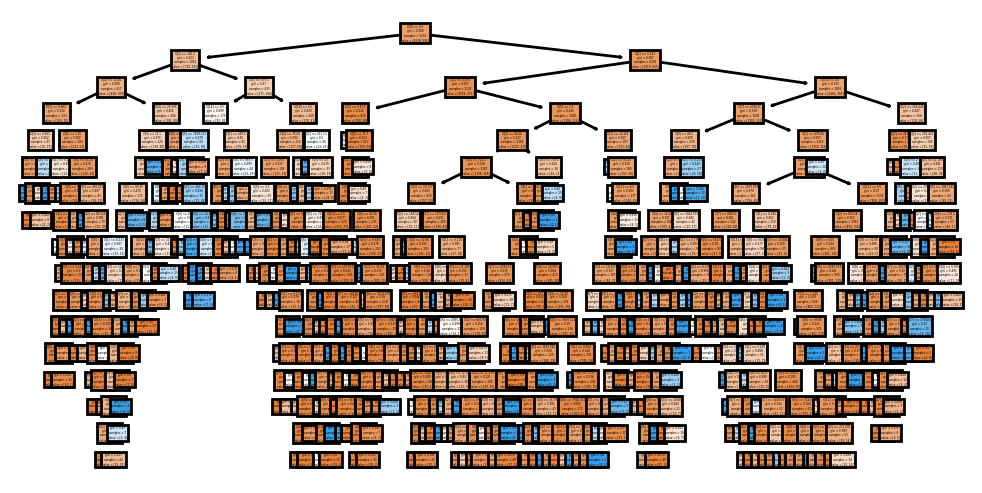

In [43]:
fig, axes = plt.subplots(figsize = (6,3), dpi=200)
tree.plot_tree(clf_best, filled = True)
plt.show()

### On the testing set

In [44]:
#Predict the response for training dataset
y_pred_best_train = clf_best.predict(X_train)
print("Train balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_train, y_pred_best_train), 4))

Train balanced accuracy score:  0.736


In [45]:
#Predict the response for validation dataset
y_pred_best = clf_best.predict(X_val)
print("Validation balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best), 4))

Validation balanced accuracy score:  0.5264


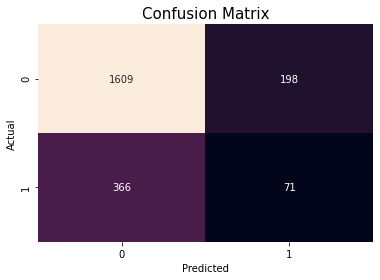

In [46]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_best, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [47]:
print(metrics.classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1807
           1       0.26      0.16      0.20       437

    accuracy                           0.75      2244
   macro avg       0.54      0.53      0.53      2244
weighted avg       0.71      0.75      0.72      2244



In [48]:
print("Recall: ", round(recall_score(y_val, y_pred_best), 4))
print("Specificity: ", round(1609/(1609+198), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_best), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_best), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_best), 4))

Recall:  0.1625
Specificity:  0.8904
Precision Score:  0.2639
Balanced Accuracy:  0.5264
F1 Score:  0.2011


Due to the imbalanced data as the number of observations per class is not equally distributed and that applies to this case, this might introduce significant inaccuracy if accuracy matric is used for evaluation. Therefore, balanced accuracy and F1 score would be utilized here instead. When compared with the default model, these modified metrics appear to have similar figures of scores. I would assume that this is due to a very small grid and there is not much choice anyways, which may explain why scores give me the similar combinations and hence the minimal betterment of scoring tables. This model exibits overfitting by comparison of training and testing scores.

In addition, the decision tree algorithm is effective for balanced classification, although it does not perform well on this imbalanced datasets.The tree points of separation are chosen to split into different groups with minimum mixing. When both types are dominated by samples from one class, the criteria employed to select a separation point will see good split, when in fact, the example from the minority class are being ignored here.

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Initiate Random Forest classifer object
rf = RandomForestClassifier(random_state=2020)
# Random Forest classifer
rf = rf.fit(X_train, y_train)

#Predict the response for train dataset
y_pred_rf1 = rf.predict(X_train)
print("Train Accuracy:",round(metrics.accuracy_score(y_train, y_pred_rf1), 4))
print("Train Balanced Accuracy: ", round(balanced_accuracy_score(y_train, y_pred_rf1), 4))
print("-------------------------------------")

#Predict the response for validation dataset
y_pred_rf2 = rf.predict(X_val)
print("Validation Accuracy:",round(metrics.accuracy_score(y_val, y_pred_rf2), 4))
print("Validation Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_rf2), 4))
print("-------------------------------------")

Train Accuracy: 1.0
Train Balanced Accuracy:  1.0
-------------------------------------
Validation Accuracy: 0.8061
Validation Balanced Accuracy:  0.5144
-------------------------------------


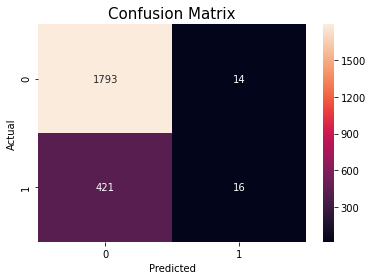

In [51]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_rf2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [52]:
print(metrics.classification_report(y_val, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.53      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.67      0.51      0.48      2244
weighted avg       0.76      0.81      0.73      2244



In [53]:
print("Recall: ", round(recall_score(y_val, y_pred_rf2), 4))
print("Specificity: ", round(1793/(1793+14), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_rf2), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_rf2), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_rf2), 4))

Recall:  0.0366
Specificity:  0.9923
Precision Score:  0.5333
Balanced Accuracy:  0.5144
F1 Score:  0.0685


#### Using all the training data perform cross-validation:

In [54]:
# Select the min_samples_split hyper-parameter and apply cross validation to find the best value
min_samples_split = list(range(2, 50, 2))
cvScore = []
for sn in min_samples_split:
    ## Initiate random forest classifer object
    rf = RandomForestClassifier(min_samples_split = sn, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("Min_samples_split: ", min_samples_split[index])
print("Balanced Accuracy: ", max(cvScore))

Min_samples_split:  2
Balanced Accuracy:  0.5119598767684876


In [55]:
# Select the max_depth hyper-parameter and apply cross validation to find the best value
max_depth = list(range(2, 50, 2))
cvScore = []
for md in max_depth:
    # Initiate random forest classifer object
    rf = RandomForestClassifier(max_depth = md, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("Max_Depth: ", max_depth[index])
print("Balanced Accuracy: ", max(cvScore))

Max_Depth:  24
Balanced Accuracy:  0.5132231913677117


In [56]:
# Select the n_estimators hyper-parameter and apply cross validation to find the best value
n_estimators = list(range(100, 500, 50))
cvScore = []
for ne in n_estimators:
    # Initiate random forest classifer object
    rf = RandomForestClassifier(n_estimators = ne, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("n_estimators: ", n_estimators[index])
print("Balanced Accuracy: ", max(cvScore))

n_estimators:  200
Balanced Accuracy:  0.5128083210669521


#### Perform grid search where you check for combinations of these hyper-parameters

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': list(range(10, 20, 2)),
    'min_samples_split': list(range(10, 20, 2)),
    'n_estimators': list(range(100, 400, 100))
}

# Create a based model
rf = RandomForestClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                         'min_samples_split': [10, 12, 14, 16, 18],
                         'n_estimators': [100, 200, 300]},
             scoring='balanced_accuracy')

Since the ranges in the previous steps made this search longer to complete running. Therefore, I  reduced the ranges to smaller number.

### The best Model

In [58]:
# examine the best model
# Single best score achieved across all params
print("Best Balanced Accuracy Score: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best Balanced Accuracy Score:  0.5087051648561083
Best Combined Parameters:  {'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 200}


#### Train with best model

In [59]:
# Train with best hyperparameters
rf_best = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=200, random_state=2020)
rf_best = rf_best.fit(X_train, y_train)

In [60]:
#Predict the response for training dataset
y_pred_best_train = rf_best.predict(X_train)
print("Train balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_train, y_pred_best_train), 4))
print("-------------------------------------------")

#Predict the response for validation dataset
y_pred_best_val = rf_best.predict(X_val)
print("Validation balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("-------------------------------------------")

Train balanced accuracy score:  0.7048
-------------------------------------------
Validation balanced accuracy score:  0.5146
-------------------------------------------


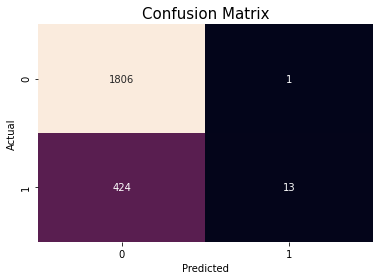

In [61]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_best_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [62]:
print(metrics.classification_report(y_val, y_pred_best_val))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1807
           1       0.93      0.03      0.06       437

    accuracy                           0.81      2244
   macro avg       0.87      0.51      0.48      2244
weighted avg       0.83      0.81      0.73      2244



In [63]:
print("Recall: ", round(recall_score(y_val, y_pred_best_val), 4))
print("Specificity: ", round(1806/(1806+1), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_best_val), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_best_val), 4))

Recall:  0.0297
Specificity:  0.9994
Precision Score:  0.9286
Balanced Accuracy:  0.5146
F1 Score:  0.0576


Since the Random forests are built on decision trees, and decision trees are sensitive to class imbalance as the results showed in the previous question. Each tree is built on a bag, and each bag is a uniform random sample from the data with replacement. Generally speaking, it could be said that each tree in this Random Forest model get impacted in the same biased direction and magitude by the imbalance of major class.

With comparison to the default model, the balanced accuracy in the model with grid search get minimal improvement. The model seems to be unsuitable in this type of data unless the imbalanced issue is resolved before the classifier would be executed again.

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# Initiate Random Forest classifer object
adaboost = AdaBoostClassifier(random_state=2222)
# Random Forest classifer
adaboost = adaboost.fit(X_train, y_train)

In [66]:
#Predict the response for train dataset
y_pred_ada1 = adaboost.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",round(metrics.accuracy_score(y_train, y_pred_ada1), 4))
print("Train Balanced Accuracy: ", round(balanced_accuracy_score(y_train, y_pred_ada1), 4))
print("-------------------------------------")

#Predict the response for validation dataset
y_pred_ada2 = adaboost.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Validation Accuracy:",round(metrics.accuracy_score(y_val, y_pred_ada2), 4))
print("Validation Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_ada2), 4))
print("-------------------------------------")

Train Accuracy: 0.8152
Train Balanced Accuracy:  0.5334
-------------------------------------
Validation Accuracy: 0.8035
Validation Balanced Accuracy:  0.5136
-------------------------------------


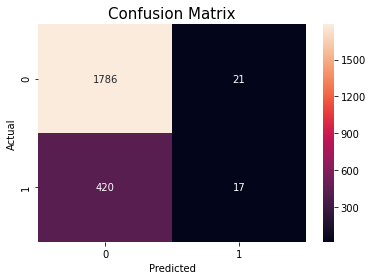

In [67]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_ada2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [68]:
print(metrics.classification_report(y_val, y_pred_ada2))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.45      0.04      0.07       437

    accuracy                           0.80      2244
   macro avg       0.63      0.51      0.48      2244
weighted avg       0.74      0.80      0.73      2244



In [69]:
print("Recall: ", round(recall_score(y_val, y_pred_ada2), 4))
print("Specificity: ", round(1786/(1786+21), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_ada2), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_ada2), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_ada2), 4))

Recall:  0.0389
Specificity:  0.9884
Precision Score:  0.4474
Balanced Accuracy:  0.5136
F1 Score:  0.0716


#### Using all the training data perform cross-validation:

In [70]:
# Select the learning_rate hyper-parameter and apply cross validation to find the best value
learning_rate = list(range(1, 10, 2))
cvScore = []
for lr in learning_rate:
    # Initiate adaboost classifer object
    adaboost = AdaBoostClassifier(learning_rate = lr, random_state=2222)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(adaboost, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("learning_rate: ", learning_rate[index])
print("Balanced Accuracy: ", max(cvScore))

learning_rate:  1
Balanced Accuracy:  0.515133170322251


In [71]:
# Select the n_estimators hyper-parameter and apply cross validation to find the best value
n_estimators = list(range(100, 500, 50))
cvScore = []
for ne in n_estimators:
    ## Initiate adaboost classifer object
    adaboost = AdaBoostClassifier(n_estimators = ne,random_state=2222)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(adaboost, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))
    
index = cvScore.index(max(cvScore))
print("n_estimators: ", n_estimators[index])
print("Balanced Accuracy: ", max(cvScore))

n_estimators:  350
Balanced Accuracy:  0.5267174160310452


#### Perform grid search where you check for combinations of these hyper-parameters

In [72]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate': list(range(1, 10, 2)),
    'n_estimators': list(range(100, 500, 50))
}

# Create a based model
adaboost = AdaBoostClassifier(random_state=2222)

# Instantiate the grid search model
grid_search = GridSearchCV(adaboost, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=2222), n_jobs=-1,
             param_grid={'learning_rate': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450]},
             scoring='balanced_accuracy')

In [73]:
# examine the best model
# Single best score achieved across all params
print("Best balanced accuracy Score: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best balanced accuracy Score:  0.5267174160310452
Best Combined Parameters:  {'learning_rate': 1, 'n_estimators': 350}


#### Train with best model

In [74]:
# Train with best hyperparameters
ada_best = AdaBoostClassifier(learning_rate=1, n_estimators=350, random_state=2222)
ada_best = ada_best.fit(X_train, y_train)

In [75]:
#Predict the response for training dataset
y_pred_best_train = ada_best.predict(X_train)
print("Train balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_train, y_pred_best_train), 4))
print("-------------------------------------------")

#Predict the response for validation dataset
y_pred_best_val = ada_best.predict(X_val)
print("Validation balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("-------------------------------------------")

Train balanced accuracy score:  0.561
-------------------------------------------
Validation balanced accuracy score:  0.5201
-------------------------------------------


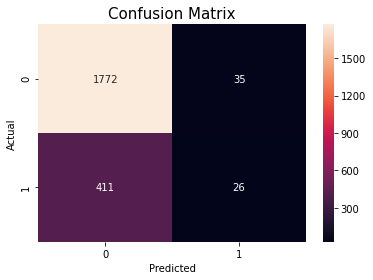

In [76]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_best_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [77]:
print(metrics.classification_report(y_val, y_pred_best_val))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1807
           1       0.43      0.06      0.10       437

    accuracy                           0.80      2244
   macro avg       0.62      0.52      0.50      2244
weighted avg       0.74      0.80      0.74      2244



In [78]:
print("Recall: ", round(recall_score(y_val, y_pred_best_val), 4))
print("Specificity: ", round(1772/(1772+35), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_best_val), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_best_val), 4))

Recall:  0.0595
Specificity:  0.9806
Precision Score:  0.4262
Balanced Accuracy:  0.5201
F1 Score:  0.1044


Referring to the results above, it could be seen that its balanced accuracy get increased by almost 2% compared with the default model at the very first. From theory, each adaboost classifier is serially trained with the goal of correctly classifying examples in every round that were incorrectly classified in the previous round. After each iteration, the weights of misclassified instances are increased and the weights of correctly classified instances are decreased.

This resulted in the improvement of score and even compared with the previous models. The adaboost seems to outperform decision tree and random forest. It might be due to the fact that their updated weight technique heavily impacts the type of imbalanced classes. This is because the weak learners would get better and better in each iteration in adaboost model.

# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Initiate RGradientBoostingClassifier object
gbclf = GradientBoostingClassifier(random_state=2020)
# GradientBoostingClassifier
gbclf = gbclf.fit(X_train, y_train)

In [81]:
#Predict the response for train dataset
y_pred_gbclf_train = gbclf.predict(X_train)
print("Train Accuracy:",round(metrics.accuracy_score(y_train, y_pred_gbclf_train), 4))
print("Train Balanced Accuracy: ", round(balanced_accuracy_score(y_train, y_pred_gbclf_train), 4))
print("-------------------------------------")

#Predict the response for validation dataset
y_pred_gbclf_val = gbclf.predict(X_val)
print("Validation Accuracy:",round(metrics.accuracy_score(y_val, y_pred_gbclf_val), 4))
print("Validation Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_gbclf_val), 4))
print("-------------------------------------")

Train Accuracy: 0.8292
Train Balanced Accuracy:  0.5539
-------------------------------------
Validation Accuracy: 0.8057
Validation Balanced Accuracy:  0.515
-------------------------------------


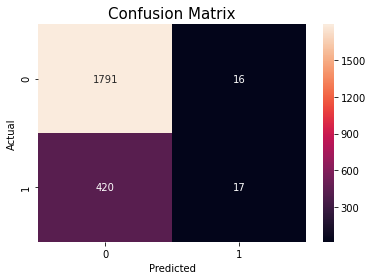

In [82]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_gbclf_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [83]:
print(metrics.classification_report(y_val, y_pred_gbclf_val))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1807
           1       0.52      0.04      0.07       437

    accuracy                           0.81      2244
   macro avg       0.66      0.52      0.48      2244
weighted avg       0.75      0.81      0.73      2244



In [84]:
print("Recall: ", round(recall_score(y_val, y_pred_gbclf_val), 4))
print("Specificity: ", round(1791/(1791+16), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_gbclf_val), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_gbclf_val), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_gbclf_val), 4))

Recall:  0.0389
Specificity:  0.9911
Precision Score:  0.5152
Balanced Accuracy:  0.515
F1 Score:  0.0723


#### Perform grid search where you check for combinations of these hyper-parameters

In [85]:
# Select the learning_rate hyper-parameter and apply cross validation to find the best value
learning_rate = list(range(1, 10, 2))
cvScore = []
for lr in learning_rate:
    ## Initiate classifer object
    gbclf = GradientBoostingClassifier(learning_rate = lr,random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(gbclf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("learning_rate: ", learning_rate[index])
print("Balanced Accuracy: ", max(cvScore))

learning_rate:  5
Balanced Accuracy:  0.5599796722747346


In [86]:
# Select the n_estimators hyper-parameter and apply cross validation to find the best value
n_estimators = ln_estimators = list(range(100, 500, 100))
cvScore = []
for ne in n_estimators:
    ## Initiate classifer object
    gbclf = GradientBoostingClassifier(n_estimators = ne, random_state=2020)
    # Evaluation of Classifer
    cvScore.append(np.mean(cross_val_score(gbclf, X_train, y_train, cv=10, scoring='balanced_accuracy', n_jobs=-1)))

index = cvScore.index(max(cvScore))
print("n_estimators: ", n_estimators[index])
print("Balanced Accuracy: ", max(cvScore))

n_estimators:  400
Balanced Accuracy:  0.5278399429866713


In [87]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'learning_rate': list(range(1, 10, 2)),
    'n_estimators': list(range(100, 500, 100))
}

# Create a based model
gbclf = GradientBoostingClassifier(random_state=2020)

# Instantiate the grid search model
grid_search = GridSearchCV(gbclf, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1)

# fit the grid with data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=2020),
             n_jobs=-1,
             param_grid={'learning_rate': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='balanced_accuracy')

#### Train with the best hyperparameters

In [88]:
# examine the best model
# Single best score achieved across all params
print("Best Balanced Accuracy Score: ", grid_search.best_score_)

# Dictionary containing the parameters used to generate that score
print("Best Combined Parameters: ", grid_search.best_params_)

Best Balanced Accuracy Score:  0.5599796722747346
Best Combined Parameters:  {'learning_rate': 5, 'n_estimators': 100}


In [89]:
# Train with best hyperparameters
gbclf_best = GradientBoostingClassifier(n_estimators=100, learning_rate=5, random_state=2020)
gbclf_best = gbclf_best.fit(X_train, y_train)

In [90]:
#Predict the response for training dataset
y_pred_best_train = gbclf_best.predict(X_train)
print("Train balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_train, y_pred_best_train), 4))
print("-------------------------------------------")

#Predict the response for validation dataset
y_pred_best_val = gbclf_best.predict(X_val)
print("Validation balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("-------------------------------------------")

Train balanced accuracy score:  0.5452
-------------------------------------------
Validation balanced accuracy score:  0.54
-------------------------------------------


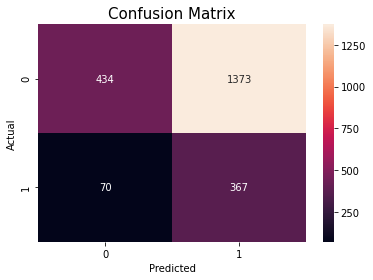

In [91]:
# Creating confusion matrix
confusion_matrix =  pd.crosstab(index=y_val, columns=y_pred_best_val, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [92]:
print(metrics.classification_report(y_val, y_pred_best_val))

              precision    recall  f1-score   support

           0       0.86      0.24      0.38      1807
           1       0.21      0.84      0.34       437

    accuracy                           0.36      2244
   macro avg       0.54      0.54      0.36      2244
weighted avg       0.73      0.36      0.37      2244



In [93]:
print("Recall: ", round(recall_score(y_val, y_pred_best_val), 4))
print("Specificity: ", round(434/(434+1373), 4))
print("Precision Score: ", round(precision_score(y_val, y_pred_best_val), 4))
print("Balanced Accuracy: ", round(balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("F1 Score: ", round(f1_score(y_val, y_pred_best_val), 4))

Recall:  0.8398
Specificity:  0.2402
Precision Score:  0.2109
Balanced Accuracy:  0.54
F1 Score:  0.3372


From the balanced accuracy of the train and validation sets, it could be said that this model appeared to overcome the overfitting that occured in the decision tree and random forest models. It could be well-tuned in selecting the parameters using grid search with proper range of hyperparameters. In addition, it showed that the gradient boosting classifier produced a 3% increase of balanced accuracy compared to the default model which has the greatest improvement among the rest of classifier.

This model internally calculates the loss function, updates the target at every stage and comes up with an improved classifier as compared to the initial classifier. However, if parameters are not tuned correctly it may result in over-fitting.

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

#### Two ways to improve accuracy - recall

(!) As the main issue that heavily impacts our models is that the dataset consists of unbalanced classes. Therefore, it is essential to balance the data in order to improve the accuracy in each model. This experiment will be applying oversampling method to combate the issue. Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when we don’t have a ton of data to work with like in this project.

(2) Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to our predictive models. The SelectFromModel class will be utilized to define both the model I wish to calculate importance scores, RandomForestClassifier in this project, and the number of features to select, 7 for this experiemnt.

In [94]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [95]:
# Original Split
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

### (1) Random Oversampling Implementation

In [96]:
ros = RandomOverSampler(random_state=1414)

# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 6045, 1: 1433})
Resample dataset shape Counter({0: 6045, 1: 6045})


#### Train-Test Split for a balanced dataset

In [97]:
X_ros_train, X_ros_val, y_ros_train, y_ros_val = train_test_split(X_ros, y_ros, test_size=0.30, random_state=2020)

#### Evaluate Models after resampling process

In [98]:
# Decision Tree
clf_ros = DecisionTreeClassifier(random_state=2020)
clf_ros = clf_ros.fit(X_ros_train, y_ros_train)
#Predict the response for validation dataset
y_pred_clf_ros = clf_ros.predict(X_ros_val)

In [99]:
# Random Forest
rf_ros = RandomForestClassifier(random_state=2020)
rf_ros = rf_ros.fit(X_ros_train, y_ros_train)
#Predict the response for validation dataset
y_pred_rf_ros = rf_ros.predict(X_ros_val)

In [100]:
# Adaboost
adaboost_ros = AdaBoostClassifier(random_state=2222)
adaboost_ros = adaboost_ros.fit(X_ros_train, y_ros_train)
#Predict the response for validation dataset
y_pred_ada_ros = adaboost_ros.predict(X_ros_val)

In [101]:
# Gradient
gbclf_ros = GradientBoostingClassifier(random_state=2020)
gbclf_ros = gbclf_ros.fit(X_ros_train, y_ros_train)
#Predict the response for validation dataset
y_pred_gbclf_ros = gbclf_ros.predict(X_ros_val)

In [102]:
# define
a = round(recall_score(y_val, y_pred2), 4)
b = round(recall_score(y_ros_val, y_pred_clf_ros), 4)
c = round(recall_score(y_val, y_pred_rf2), 4)
d = round(recall_score(y_ros_val, y_pred_rf_ros), 4)
e = round(recall_score(y_val, y_pred_ada2), 4)
f = round(recall_score(y_ros_val, y_pred_ada_ros), 4)
g = round(recall_score(y_val, y_pred_gbclf_val), 4)
h = round(recall_score(y_ros_val, y_pred_gbclf_ros), 4)

data = [['-------------', '-------------', '-------------',],
['Decision Tree', a, b],
['Random Forest', c, d],
['Adaboost', e, f],
['GradientBoosting', g, h]]
headers=["Model", "Before", "After"]

print('------------------------------------------------------')
print("Below is the comparison table for recall score")
print('------------------------------------------------------')
print(pd.DataFrame(data=data, index=None, columns=headers))
print('------------------------------------------------------')

------------------------------------------------------
Below is the comparison table for recall score
------------------------------------------------------
              Model         Before          After
0     -------------  -------------  -------------
1     Decision Tree          0.254         0.9584
2     Random Forest         0.0366         0.9557
3          Adaboost         0.0389         0.6056
4  GradientBoosting         0.0389         0.6548
------------------------------------------------------


### (2) Feature Selection Implementation
In this experiemnt, in addition to performing the resampling of my data I have utilized the feature selection in order to strengthen the accuracy, in fact the recall as requested  

In [103]:
from sklearn.feature_selection import SelectFromModel
from matplotlib import pyplot

Feature: 0, Score: 0.02360
Feature: 1, Score: 0.11596
Feature: 2, Score: 0.10957
Feature: 3, Score: 0.10897
Feature: 4, Score: 0.10487
Feature: 5, Score: 0.08154
Feature: 6, Score: 0.10742
Feature: 7, Score: 0.10275
Feature: 8, Score: 0.10902
Feature: 9, Score: 0.05325
Feature: 10, Score: 0.01412
Feature: 11, Score: 0.00791
Feature: 12, Score: 0.01191
Feature: 13, Score: 0.00967
Feature: 14, Score: 0.01304
Feature: 15, Score: 0.00516
Feature: 16, Score: 0.00646
Feature: 17, Score: 0.00529
Feature: 18, Score: 0.00950


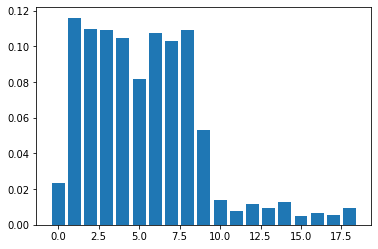

In [104]:
# Feature importance using decision tree as base
clf_ros = DecisionTreeClassifier(random_state=2020)
# fit the model
clf_ros = clf_ros.fit(X_ros_train, y_ros_train)

# get importance
importance = rf_ros.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### As plot above, 7 features will be selected in the feature selection process.

In [105]:
# feature selection function
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=7)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [106]:
# split into train and test sets

# fit predictor and target variable 
# X_ros, y_ros = ros.fit_resample(X, y)

# split the balanced dataset
X_ros_train, X_ros_val, y_ros_train, y_ros_val = train_test_split(X_ros, y_ros, test_size=0.30, random_state=2020)

# feature selection
X_train_fs, X_val_fs, fs = select_features(X_ros_train, y_ros_train, X_ros_val)

In [107]:
# fit the model
clf_fs = DecisionTreeClassifier(random_state=2020)
clf_fs = clf_fs.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_fs = clf_fs.predict(X_val_fs)
# evaluate predictions
i = round(recall_score(y_ros_val, y_pred_fs), 4)

In [108]:
# Random Forest
rf_fs = RandomForestClassifier(random_state=2020)
rf_fs = rf_fs.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_rf_fs = rf_fs.predict(X_val_fs)
# evaluate predictions
j = round(recall_score(y_ros_val, y_pred_rf_fs), 4)

In [109]:
# Adaboost
adaboost_fs = AdaBoostClassifier(random_state=2222)
adaboost_fs = adaboost_fs.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_ada_fs = adaboost_fs.predict(X_val_fs)
# evaluate predictions
k = round(recall_score(y_ros_val, y_pred_ada_fs), 4)

In [110]:
# Gradient
gbclf_fs = GradientBoostingClassifier(random_state=2020)
gbclf_fs = gbclf_fs.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_gbclf_fs = gbclf_fs.predict(X_val_fs)
# evaluate predictions
l = round(recall_score(y_ros_val, y_pred_gbclf_fs), 4)

In [111]:
# define
a = round(recall_score(y_val, y_pred2), 4)
b = round(recall_score(y_ros_val, y_pred_clf_ros), 4)
c = round(recall_score(y_val, y_pred_rf2), 4)
d = round(recall_score(y_ros_val, y_pred_rf_ros), 4)
e = round(recall_score(y_val, y_pred_ada2), 4)
f = round(recall_score(y_ros_val, y_pred_ada_ros), 4)
g = round(recall_score(y_val, y_pred_gbclf_val), 4)
h = round(recall_score(y_ros_val, y_pred_gbclf_ros), 4)

data = [['-------------', '-------------', '-------------', '-------------'],
['Decision Tree', a, b, i],
['Random Forest', c, d, j],
['Adaboost', e, f, k],
['GradientBoosting', g, h, l]]
headers=["Model", "Base", "Resampling", "Resampling+FS"]

print('------------------------------------------------------------------')
print("         Below is the comparison table for recall score           ")
print('------------------------------------------------------------------')
print(pd.DataFrame(data=data, index=None, columns=headers))
print('------------------------------------------------------------------')

------------------------------------------------------------------
         Below is the comparison table for recall score           
------------------------------------------------------------------
              Model           Base     Resampling  Resampling+FS
0     -------------  -------------  -------------  -------------
1     Decision Tree          0.254         0.9584         0.9595
2     Random Forest         0.0366         0.9557         0.9541
3          Adaboost         0.0389         0.6056          0.618
4  GradientBoosting         0.0389         0.6548         0.6861
------------------------------------------------------------------


As the results show above, fortunately both methods seem to be working very well and added efficiency to each other in order to prepare data and enhance capability of the selected classifiers in this project. The recall metric is determined here. It is the measure of our model correctly identifying True Positives. Thus, for all the person who actually did not fully pay loans back, recall tells us how many we correctly identified person as not having potential for lending money business. 

As illustrated above, the resampling technique showed significant improvement on the score. That makes the classifier become more accurate in predicting the cases. The decision tree model get roughly 70% betterment and it display about 90% improvement for the random forest classifier. This also implied that these models might be very sensitive to imbalanced classes. Hence, it get better when they got resampling in place. Whereas, the adaboost and gradient boosting models also showed more than 50% improvement after resampling the data.

In addition to the resampling technique, I implemented them further by applying the feature selection technique. The last column on the table above demonstrated that most of classifiers benefited from feature selection with approximately 2 % increase of the recall score. Our models are having more confident in predicting the positive cases.

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

### The best fitted model for each classifiers

In this question, I will be utilizing the fitted model from the best hyperpameters that produced from my gridsearch together with the full implementation of improved method found in the Q8.

In [112]:
# (1) Resampling the dataset
ros = RandomOverSampler(random_state=1414)
# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(X, y)
# split into train and test sets
X_ros_train, X_ros_val, y_ros_train, y_ros_val = train_test_split(X_ros, y_ros, test_size=0.30, random_state=2020)

# (2) Feature selection
X_train_fs, X_val_fs, fs = select_features(X_ros_train, y_ros_train, X_ros_val)

In [113]:
# Decision Tree with GridSearch best hyperparameters and improved ways
clf_best_full = DecisionTreeClassifier(min_samples_split=20, max_depth=16, random_state=2020)
clf_best_full = clf_best_full.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_best_dt = clf_best_full.predict(X_val_fs)
print("GridSearch balanced accuracy: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best), 4))
print("Final DT Model balanced accuracy: ", round(metrics.balanced_accuracy_score(y_ros_val, y_pred_best_dt), 4))

GridSearch balanced accuracy:  0.5264
Final DT Model balanced accuracy:  0.7344


In [114]:
# Random forest with GridSearch best hyperparameters and improved ways
rf_best_full = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=200, random_state=2020)
rf_best_full = rf_best_full.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_best_rf = rf_best_full.predict(X_val_fs)
print("GridSearch balanced accuracy: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("Final RF Model balanced accuracy: ", round(metrics.balanced_accuracy_score(y_ros_val, y_pred_best_rf), 4))

GridSearch balanced accuracy:  0.54
Final RF Model balanced accuracy:  0.8832


In [115]:
# Adaboost with GridSearch best hyperparameters and improved ways
ada_best_full = AdaBoostClassifier(learning_rate=1, n_estimators=350, random_state=2222)
ada_best_full = ada_best_full.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_best_ada = ada_best_full.predict(X_val_fs)
print("GridSearch balanced accuracy: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("Final Adaboost Model balanced accuracy: ", round(metrics.balanced_accuracy_score(y_ros_val, y_pred_best_ada), 4))

GridSearch balanced accuracy:  0.54
Final Adaboost Model balanced accuracy:  0.6241


In [116]:
# GradientBoosting with GridSearch best hyperparameters and improved ways
gbclf_best_full = GradientBoostingClassifier(n_estimators=100, learning_rate=5, random_state=1111)
gbclf_best_full = gbclf_best_full.fit(X_train_fs, y_ros_train)
#Predict the response for validation dataset
y_pred_best_gbclf = gbclf_best_full.predict(X_val_fs)
print("GridSearch balanced accuracy score: ", round(metrics.balanced_accuracy_score(y_val, y_pred_best_val), 4))
print("Final GradientBoosting Model balanced accuracy: ", round(metrics.balanced_accuracy_score(y_ros_val, y_pred_best_gbclf), 4))

GridSearch balanced accuracy score:  0.54
Final GradientBoosting Model balanced accuracy:  0.5294


### The table summarizing results on the test set

#### Confusion Matrix for each model

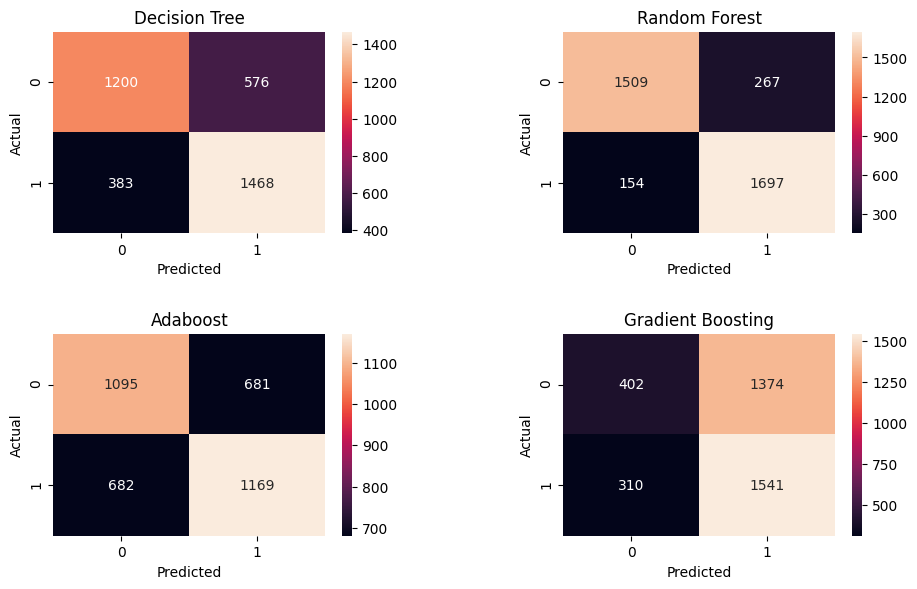

In [117]:
# plot with various axes scales
plt.figure(figsize=(10,6), dpi=100)

# Decision Tree
plt.subplot(221)
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_best_dt, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Decision Tree", fontsize = 12)

# Random Forest
plt.subplot(222)
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_best_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Random Forest", fontsize = 12)

# Adaboost
plt.subplot(223)
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_best_ada, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Adaboost", fontsize = 12)

# Gradient Boosting
plt.subplot(224)
confusion_matrix =  pd.crosstab(index=y_ros_val, columns=y_pred_best_gbclf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=True)
plt.title("Gradient Boosting", fontsize = 12)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.5)
plt.show()

In [118]:
a_1 = round(recall_score(y_ros_val, y_pred_best_dt), 4)*100
a_2 = round(1200/(1200+576), 4)*100
a_3 = round(precision_score(y_ros_val, y_pred_best_dt), 4)*100
a_4 = round(balanced_accuracy_score(y_ros_val, y_pred_best_dt), 4)*100
a_5 = round(f1_score(y_ros_val, y_pred_best_dt), 4)*100
a_6 = round(accuracy_score(y_ros_val, y_pred_best_dt), 4)*100

b_1 = round(recall_score(y_ros_val, y_pred_best_rf), 4)*100
b_2 = round(1509/(1509+267), 4)*100
b_3 = round(precision_score(y_ros_val, y_pred_best_rf), 4)*100
b_4 = round(balanced_accuracy_score(y_ros_val, y_pred_best_rf), 4)*100
b_5 = round(f1_score(y_ros_val, y_pred_best_rf), 4)*100
b_6 = round(accuracy_score(y_ros_val, y_pred_best_rf), 4)*100

c_1 = round(recall_score(y_ros_val, y_pred_best_ada), 4)*100
c_2 = round(1095/(1095+681), 4)*100
c_3 = round(precision_score(y_ros_val, y_pred_best_ada), 4)*100
c_4 = round(balanced_accuracy_score(y_ros_val, y_pred_best_ada), 4)*100
c_5 = round(f1_score(y_ros_val, y_pred_best_ada), 4)*100
c_6 = round(accuracy_score(y_ros_val, y_pred_best_ada), 4)*100

d_1 = round(recall_score(y_ros_val, y_pred_best_gbclf), 4)*100
d_2 = round(402/(1374+402), 4)*100
d_3 = round(precision_score(y_ros_val, y_pred_best_gbclf), 4)*100
d_4 = round(balanced_accuracy_score(y_ros_val, y_pred_best_gbclf), 4)*100
d_5 = round(f1_score(y_ros_val, y_pred_best_gbclf), 4)*100
d_6 = round(accuracy_score(y_ros_val, y_pred_best_gbclf), 4)*100

In [119]:
data = [['-------------', '-------------', '-------------', '-------------'],
[a_1, b_1, c_1, d_1],
[a_2, b_2, c_2, d_2],
[a_3, b_3, c_3, d_3],
[a_4, b_4, c_4, d_4],
[a_5, b_5, c_5, d_5],
[a_6, b_6, c_6, d_6]]
headers=["Decision Tree", "Random Forest", "Adaboost", "Gradient"]
indexheaders=["", "Recall", "Specificity", "Precision", "Balanced Accuracy", "F1 Score", "Accuracy"]

print("           Below is the score summarized table for all models               ")
print('_____________________________________________________________________________')
print(pd.DataFrame(data=data, index=indexheaders, columns=headers))
print('_____________________________________________________________________________')

           Below is the score summarized table for all models               
_____________________________________________________________________________
                   Decision Tree  Random Forest       Adaboost       Gradient
                   -------------  -------------  -------------  -------------
Recall                     79.31          91.68          63.16          83.25
Specificity                67.57          84.97          61.66          22.64
Precision                  71.82          86.41          63.19          52.86
Balanced Accuracy          73.44          88.32          62.41          52.94
F1 Score                   75.38          88.96          63.17          64.67
Accuracy                   73.56          88.39          62.42          53.57
_____________________________________________________________________________


From the summarized table above, it showed that Random forest appeared to be the model that outperformed the rest of classifiers with respect to this dataset. It illustarted that the model has 88.32% of balacnded accuracy and 88.39% of accuracy, both matrics could be measured in this resampled dataset. Additionally, random forest also showed the highest recall score, roughly 92%. This means that the model has 0.92 chance of predicting yes when it is actually yes case. The percentage of model performance could be further enhanced by extending the range of parameters on the grid search operation, since this results only accounted for some range that allowed to complete project within provided timeframe.

# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

In [120]:
loans_outcome_not_known.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0,0,0,1,0,0,0,0
1,0,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0,0,0,0,1,0,0,0
2,1,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0,0,0,1,0,0,0,0
3,0,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0,0,0,0,0,1,0
4,1,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0,0,1,0,0,0,0,0


In [127]:
# define X_test
X_test = loans_outcome_not_known
# Feature selection for new test set
X_train_fs, X_test_fs, fs = select_features(X_ros_train, y_ros_train, X_test)

In [128]:
# Random forest with GridSearch best hyperparameters and resampling technqiue
rf_best_full = RandomForestClassifier(min_samples_split=10, max_depth=16, n_estimators=200, random_state=2020)
rf_best_full = rf_best_full.fit(X_train_fs, y_ros_train)

In [129]:
#Predict the response for test dataset
y_pred_best_rf = rf_best_full.predict(X_test_fs)

In [130]:
# convert to pandas dataframe and rename column to predictions
df = pd.DataFrame(y_pred_best_rf, columns=['predictions'])
print(df)

      predictions
0               0
1               1
2               0
3               1
4               0
...           ...
2095            0
2096            0
2097            0
2098            0
2099            0

[2100 rows x 1 columns]


In [131]:
# save to csv file
df.to_csv('DSC540_Project2_Predictions_Natapong.csv', index = False)

# Great Job !